## EDA

In [1]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

In [2]:
df = pd.read_csv('fraudTrain.csv')

In [3]:
# Deleted first column since it was the same as the index
df = df.iloc[: , 1:]

In [4]:
# We are going to rename some columns for ease
df = df.rename(columns={'trans_date_trans_time':'date_time'})

In [5]:
# We want to change the data type of the 'date_time' column to datetime data type for easier manipulation of data
df['date_time'] = pd.to_datetime(df['date_time'])
df['date_time'].dtypes

dtype('<M8[ns]')

In [5]:
# I will keep this code here in case I want to downsize the data for the purpose of speed
df = df.sample(frac=0.01)
df.shape

(12967, 22)

In [6]:
nonfraud = len(df[df['is_fraud'] == 0]) 
fraud = len(df[df['is_fraud'] == 1])
print('The count of nonfraudulent data is:', nonfraud)
print('The count of fraudulent data is:', fraud)

dec_fraud = fraud/len(df['is_fraud']) 
print('So the ratio of fraudlent data to all data is', dec_fraud)

The count of nonfraudulent data is: 12886
The count of fraudulent data is: 81
So the ratio of fraudlent data to all data is 0.006246626050744197


Therefore, there is only 0.62% of fraudulent data. Now let's see the amount that the fraudulent data is found.

In [7]:
import plotly.express as px
fig = px.scatter(df, y="amt", x="is_fraud", title="What Amount is Fraud Found?")
fig.show()

Surprisingly, the amount that fraud is found is around $1500 and less.

In [8]:
fig = px.scatter(df, y="date_time", x="is_fraud", title="When is Fraud Found?")
fig.show()

Text(0.5, 1.0, 'Correlation Map')

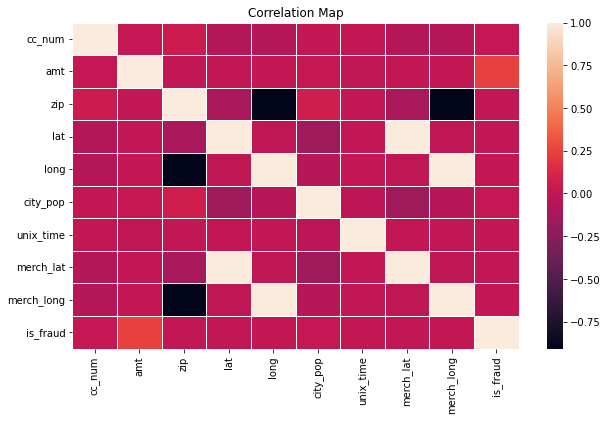

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,6))        
sns.heatmap(corr, linewidths=.5, ax=ax)
plt.title("Correlation Map")

There does not seem to be a correlation between any of the variables, except for possibly the amount of the transaction and if it is fraud, as well as the latitude and longitude of the user and merchant. Further investigation needs to be done.

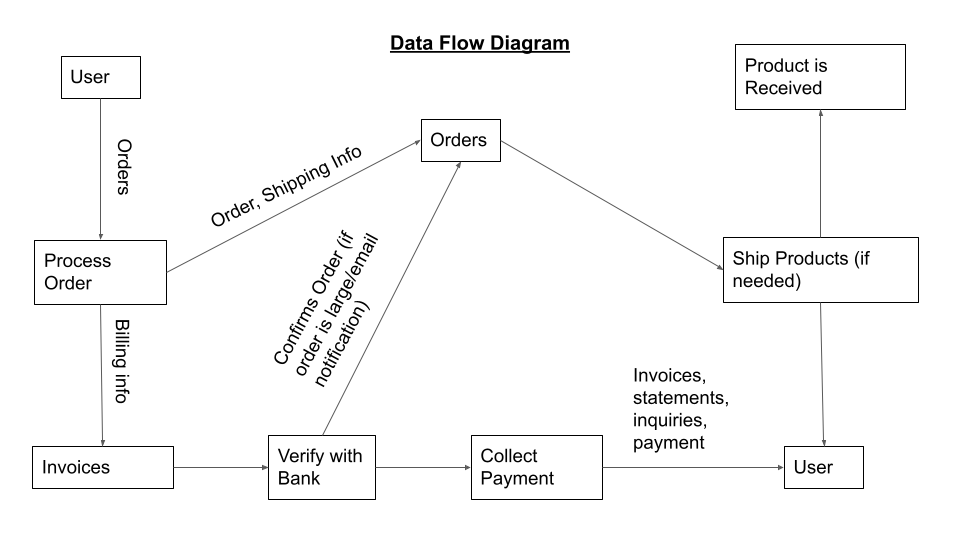

####  What are the Different Types of Properties and Relationships Among Data Entries? (Using Tableau)

Please refer to my Tableau link for more information:
https://public.tableau.com/views/Capstone3_16651683758140/CCFraudStory?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

#### What are Some of the Types of Machine Learning Models Most Suited for this Data?

So this data is a time independant process with multiple models needing to be built. The data will need to be scaled using StandardScaler() to save time and money. The first model I would like to try is the Decision Tree by fitting it the train data (75%) and checking the accuracy score and the F1 score. Then I will use the confusion matrix to show the true positives and false positive. Using the same process, I will test out on other models such as KNN, Logistic Regression, Support Vector Machine, Random Forest, and XGBoost model to figure out the winning model.

#### How Are Results Presented to End Users?

I will build a Tableau presentation using dashboard to communicate. This is done through implementing interactions between Python and Tableau. This model will integrate into the business workflow at the Verify with Bank portion. The bank can use this automated system to check for fraudulent activity. 

#### How to Evaluate Data Driven Solutions?

The Key Performance Indicator (KPI) of the solution will be evaluated on the accuracy of the system. We are aiming for 90% and above accuracy.